In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
df = pd.read_csv("breastcancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [37]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Malignant-have breast cancer 
Benign- does not have breast cancer

In [24]:
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [25]:

label_encoder = preprocessing.LabelEncoder() 

In [55]:
df['diagnosis']= label_encoder.fit_transform(df['diagnosis']) 
df['diagnosis'].unique()

array([1, 0])

In [56]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#finding the correlation matrix


In [28]:
corr_matrix = df.corr()

In [42]:
print(corr_matrix.iloc[1].sort_values(ascending=False))

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

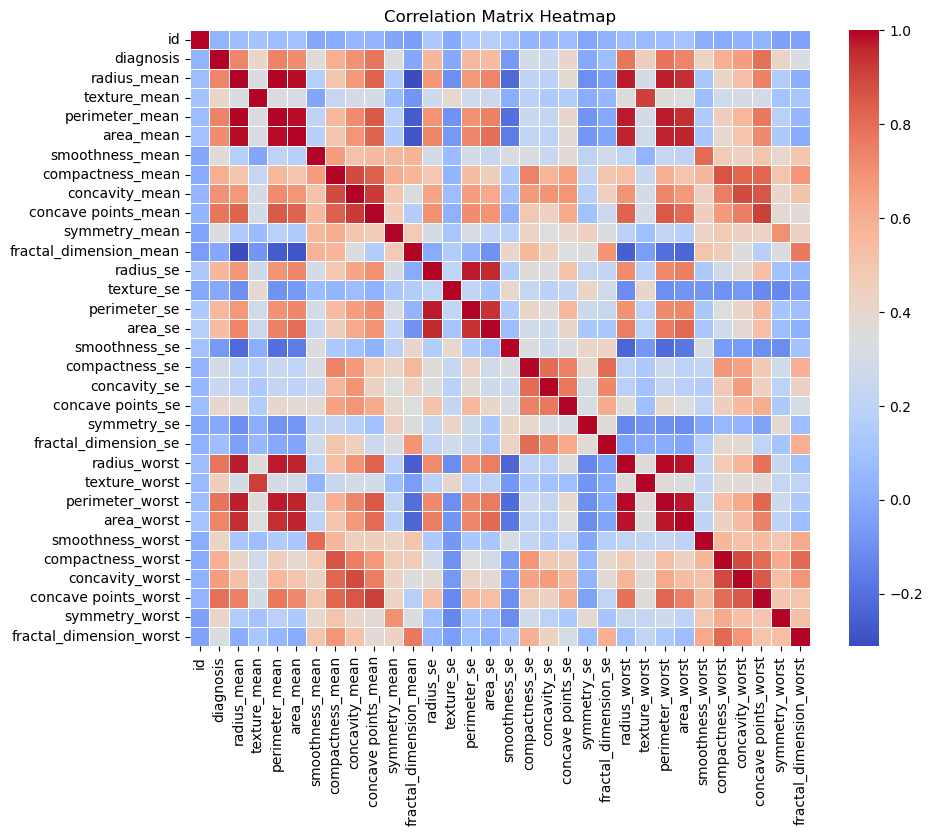

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [59]:
df = df[["concave points_worst","perimeter_worst","concave points_mean","radius_worst","perimeter_mean","area_worst","radius_mean","area_mean","diagnosis"]]
data.head()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,diagnosis
0,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0,1
1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0,1
2,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0,1
3,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1,1
4,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   concave points_worst  569 non-null    float64
 1   perimeter_worst       569 non-null    float64
 2   concave points_mean   569 non-null    float64
 3   radius_worst          569 non-null    float64
 4   perimeter_mean        569 non-null    float64
 5   area_worst            569 non-null    float64
 6   radius_mean           569 non-null    float64
 7   area_mean             569 non-null    float64
 8   diagnosis             569 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 37.9 KB


In [61]:
df.describe()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.114606,107.261213,0.048919,16.269190,91.969033,880.583128,14.127292,654.889104,0.372583
std,0.065732,33.602542,0.038803,4.833242,24.298981,569.356993,3.524049,351.914129,0.483918
min,0.000000,50.410000,0.000000,7.930000,43.790000,185.200000,6.981000,143.500000,0.000000
25%,0.064930,84.110000,0.020310,13.010000,75.170000,515.300000,11.700000,420.300000,0.000000
50%,0.099930,97.660000,0.033500,14.970000,86.240000,686.500000,13.370000,551.100000,0.000000
75%,0.161400,125.400000,0.074000,18.790000,104.100000,1084.000000,15.780000,782.700000,1.000000
max,0.291000,251.200000,0.201200,36.040000,188.500000,4254.000000,28.110000,2501.000000,1.000000


In [63]:
df.isnull().sum()

concave points_worst    0
perimeter_worst         0
concave points_mean     0
radius_worst            0
perimeter_mean          0
area_worst              0
radius_mean             0
area_mean               0
diagnosis               0
dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

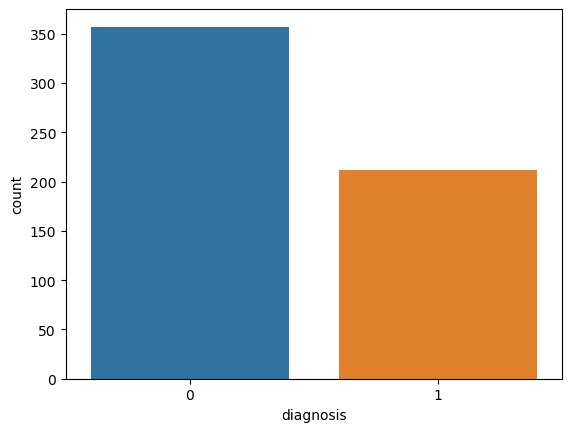

In [64]:
sns.countplot(x="diagnosis", data=df)

1- female has breast cancer
0-female does not have breast cancer

# SPLITTING OF DATASET

In [66]:
#splitting the dataset into target and features
X = df.drop(columns='diagnosis', axis=1)
Y = df['diagnosis']

In [67]:
#splitting data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [70]:
#logistic regression
model = LogisticRegression()


model.fit(X_train, Y_train)

C:\Users\KIIT\anaconda3\mlproject\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
X_pred = model.predict(X_test)
accuracy = accuracy_score(X_pred, Y_test)
print("Accuracy of model", accuracy)

Accuracy of model 0.9473684210526315


# predctive system

In [74]:
custom_input = (0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0)
input = np.asarray(custom_input)
input = input.reshape(1,-1)

pred = model.predict(input)
print(pred)

[1]


C:\Users\KIIT\anaconda3\mlproject\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# saving the model

In [75]:
import pickle
filename="breastcancer_pred_model.sav"
pickle.dump(model, open(filename, 'wb'))